In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def poisson(mu):
    def poisson_pdf(x):
        return mu ** x * np.exp(-1*mu) / np.math.factorial(x)
    return np.vectorize(poisson_pdf, otypes=[float])

plateau from 440 V to 465 V
relative gradient: 2.499 %


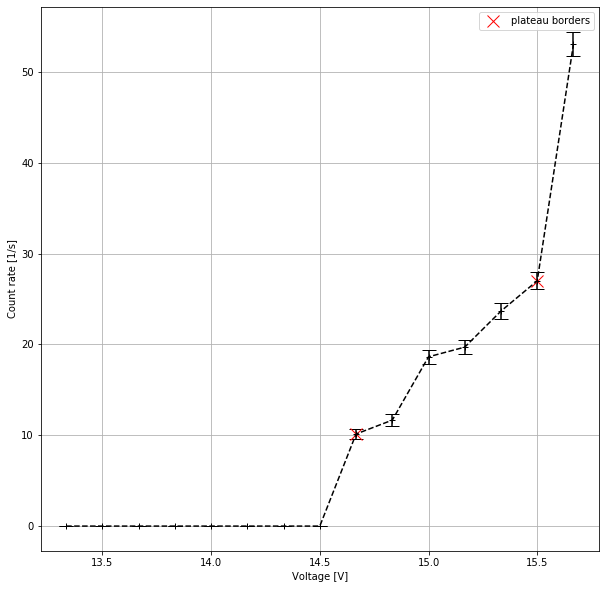

In [27]:
datadir = 'data/'
fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.grid()
ax.set_xlabel('Voltage [V]')
ax.set_ylabel('Count rate [1/s]')

filename = 'plateau_400_470_5.tsv'
data = np.loadtxt(datadir + filename, delimiter = '\t', skiprows = 11, usecols = (1,2))
t_g = 30
stds = [np.sqrt(G)/t_g for G in data[:,1]]

print('plateau from %.f V to %.f V' % (data[8,0], data[13,0]))


relative_gradient = (data[13,1] - data[8,1])/(data[13,0] - data[8,0])/data[13,1]*100
print('relative gradient: %.3f %%' % relative_gradient)

#ax.plot(data[:,0]/t_g, data[:,1]/t_g, '+', label = '')
ax.errorbar(data[:,0]/t_g, data[:,1]/t_g, fmt = 'k+--', capsize=7, yerr = stds, label = '')
ax.plot(data[pis, 0]/t_g, data[pis, 1]/t_g, 'rx', markersize=12, label = 'plateau borders')
ax.legend()

mean: 3.840
std: 3.141
Chi²: 989.118
15


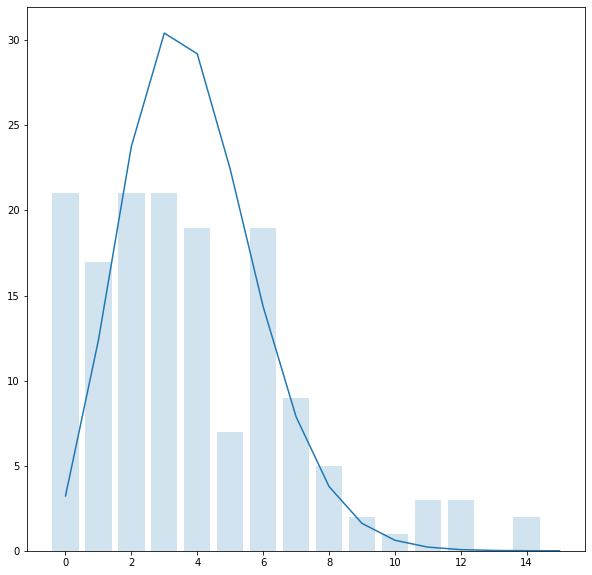

In [7]:
filename = 'background_150_10.tsv'
data = np.loadtxt(datadir + filename, delimiter = '\t', skiprows = 11, usecols = (1,2))
bins = int(max(data[:,1]) - min(data[:,1]))
freq, edges = np.histogram(data[:,1], bins)
fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.bar(edges[0:-1], freq, alpha=0.2)

mean = np.mean(data[:,-1])
std = np.std(data[:,1])
print('mean: %.3f' % mean)
print('std: %.3f' % std)

pdf = poisson(mean)
freq_c = pdf(edges)*sum(freq)
plt.plot(edges, freq_c)
chi_2 = sum([(a[0]-a[1])**2/a[1]  for a in zip(freq, freq_c)])
print('Chi²: %.3f' % chi_2)
n = len(set(data[:,1]))
print(n)

In [28]:
filename = 'detector_test_20_30.tsv'
data = np.loadtxt(datadir + filename, delimiter = '\t', skiprows = 11, usecols = (1,2))
data.shape
n_data = data[:,1]
data[:,0]

array([445., 445., 445., 445., 445., 445., 445., 445., 445., 445., 445.,
       445., 445., 445., 445., 445., 445., 445., 445., 445.])